In [1]:
import pandas as pd

import requests 
import numpy as np 
import os
import matplotlib.pyplot as plt 

from sodapy import Socrata
import fiona 
import geopandas as gpd
from shapely.geometry import Point, Polygon 

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [5]:
path = "C:\\Users\\sb536\\Desktop\\ZIP_CODES\\ZIP_CODE_040114.shp"
path
os.path.exists(path)

True

In [6]:
nyc_map = gpd.read_file(path)
nyc_map

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [7]:
BEA_ID = "6BF79D8C-8042-4196-88DC-0E0C55B0C3B6"


my_key = "https://APPS.BEA.gov/api/data?&UserID=" + BEA_ID 

data_set =  "&method=GetData&" + "datasetname=RegionalIncome&" 

table_and_line_income = "TableName=CA30&LineCode=110&" 

year = "Year=" + "2017" + "&" 

form = "ResultFormat=JSON" 
#36061 NYC
#36005 Bronx
#36081 Queens
#36047 Kings County
#36085 Richmond

In [8]:
all_counties = pd.DataFrame([])

counties = ['36061','36005','36081','36047','36085']

for i in counties:
    location = "GeoFips=" +  i + '&'
    API_URL = my_key + data_set + table_and_line_income + year + location + form
    r = requests.get(API_URL)
    all_counties = all_counties.append(pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"]))

In [9]:
client = Socrata("data.cityofnewyork.us", 'erJUIkadNwoyKoKtFO1riVSAq')

results = client.get("kiyv-ks3f", limit=2000)
results_df = pd.DataFrame.from_records(results)
print(results_df)
# results_df.spcoordx = results_df.spcoordx.astype('int64')
# results_df.spcoordy = results_df.spcoordy.astype('int64')
results_df.longitude =results_df.longitude.astype('float64')
results_df.latitude = results_df.latitude.astype('float64')
print(results_df.longitude)

                    address         bbl      bin borough census_tract  \
0                 309 47 St  3007550022  3011821       K           80   
1          50 Jefferson Ave  3019980001  3057406       K          227   
2            820 Hancock St  3014900001  3039906       K          377   
3           858 Jamaica Ave  3041060039  3090998       K       118201   
4          80 Underhill Ave  3011450026  3028204       K          205   
5           419 Waverly Ave  3019620010  3332865       K          199   
6            430 Howard Ave  3014570032  3039174       K          363   
7      557 Pennsylvania Ave  3038230001  3085070       K         1126   
8            71 Sullivan St  3005660001  3008585       K           53   
9             157 Wilson St  3021770001  3059906       K          535   
10           208 North 5 St  3023450001  3062337       K          519   
11            101 Maujer St  3027870001  3069559       K          503   
12           225 Adelphi St  3020910003  3058531   

In [10]:
geometry = [Point(xy) for xy in zip(results_df.longitude , results_df.latitude)]
crs = {'init': 'epsg:4326'}
upk = gpd.GeoDataFrame(results_df, crs=crs, geometry=geometry)
nyc_map.crs = {'init': 'epsg:4326'}

             COUNTY  SUM_HH_pop       avg_mhi  avg_hous  avg_trans  avg_ttl  \
1      Bronx County    483449.0  37041.398303     11365       3332     3202   
7      Kings County    916856.0  47216.746293     14188       4247     5509   
15  New York County    763846.0  75864.746233     17452       4876    16020   
20    Queens County    780117.0  57301.027686     15897       6167     6058   
21  Richmond County    165516.0  71576.997040     19709      10155     8549   

    disp_inc                                           geometry  
1      17378  (POLYGON ((-73.89752187153246 40.7956428474937...  
7      21424  (POLYGON ((-73.91664111143405 40.5984343974163...  
15     35952  (POLYGON ((-74.01807203144476 40.6802099574184...  
20     27172  (POLYGON ((-73.74162803147955 40.5928719574621...  
21     30746  (POLYGON ((-74.04989619138202 40.5655440773681...  


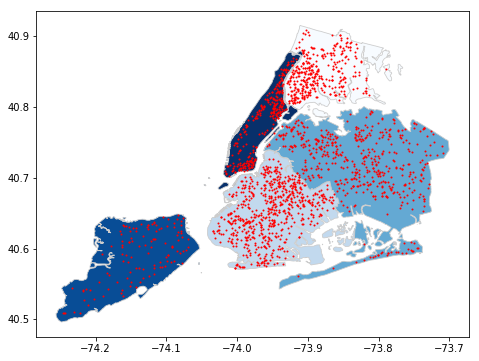

In [11]:
url = "http://data.beta.nyc//dataset/9572746e-5fec-4623-889a-eb6eb195101f/resource/0c322985-3c47-4a5f-a4ef-a27a8cf675b2/download/f28d740931ce480092d53307e6e37abageojsonmedianhouseholdincomecounty.geojson"
counties = gpd.read_file(url)

counties =counties[(counties.COUNTY == 'Bronx County') | (counties.COUNTY == 'New York County') | (counties.COUNTY == 'Queens County') | (counties.COUNTY == 'Kings County') | (counties.COUNTY =='Richmond County')]
print(counties)
counties.crs = upk.crs
fig, ax = plt.subplots(1, figsize = (10,6))
counties.plot(ax=ax,column='avg_mhi', cmap='Blues', linewidth=0.8,edgecolor='0.8')
upk.plot(ax=ax, marker='o', color='red', markersize=1)